In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
leads_dataset = pd.read_csv("Leads.csv")
leads_dataset.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [3]:
leads_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### Looks like there are some missing values

In [4]:
leads_dataset.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

# Data Cleaning


In [5]:
remove_rows=[]
# print percentage of missing values
for col in leads_dataset.columns:
    null_count = leads_dataset[col].isnull().sum()
    if(null_count > 0):
        percent = round((null_count/9240)*100,2)
        print("{0}  :   {1}%".format(col, percent))
        if(percent < 30):
              remove_rows.append(col)
#leads_dataset.isnull().sum()

Lead Source  :   0.39%
TotalVisits  :   1.48%
Page Views Per Visit  :   1.48%
Last Activity  :   1.11%
Country  :   26.63%
Specialization  :   15.56%
How did you hear about X Education  :   23.89%
What is your current occupation  :   29.11%
What matters most to you in choosing a course  :   29.32%
Tags  :   36.29%
Lead Quality  :   51.59%
Lead Profile  :   29.32%
City  :   15.37%
Asymmetrique Activity Index  :   45.65%
Asymmetrique Profile Index  :   45.65%
Asymmetrique Activity Score  :   45.65%
Asymmetrique Profile Score  :   45.65%


- Lets keep a threshold of 30% for missing values. if missing values < 30%, we will remove those rows instead of treating them.

In [6]:
remove_rows

['Lead Source',
 'TotalVisits',
 'Page Views Per Visit',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Lead Profile',
 'City']

In [7]:
for col in remove_rows:
    leads_dataset = leads_dataset[~(leads_dataset[col].isna())]

In [8]:
leads_dataset.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                             0
Specialization                                      0
How did you hear about X Education                  0
What is your current occupation                     0
What matters most to you in choosing a course       0
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
missing=[]
# print percentage of missing values
for col in leads_dataset.columns:
    null_count = leads_dataset[col].isnull().sum()
    if(null_count > 0):
        missing.append(col)

In [10]:
missing

['Tags',
 'Lead Quality',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [11]:
leads_dataset['Tags'].value_counts()

Will revert after reading the email                  1534
Ringing                                              1053
Interested in other courses                           372
Already a student                                     343
switched off                                          223
Busy                                                  174
Closed by Horizzon                                    172
Not doing further education                           131
Interested  in full time MBA                           98
Graduation in progress                                 92
Lost to EINS                                           89
invalid number                                         75
Diploma holder (Not Eligible)                          48
wrong number given                                     43
opp hangup                                             30
number not provided                                    23
in touch with EINS                                      9
In confusion w

- treat missing values with mode for categorical columns

In [12]:
leads_dataset['Tags'] = leads_dataset['Tags'].fillna(leads_dataset['Tags'].mode()[0])

In [13]:
leads_dataset['Lead Quality'].value_counts()

Might be             1206
Not Sure              986
Worst                 478
Low in Relevance      431
High in Relevance     394
Name: Lead Quality, dtype: int64

In [14]:
leads_dataset['Lead Quality'] = leads_dataset['Lead Quality'].fillna(leads_dataset['Lead Quality'].mode()[0])

- Since 45% of values for Asymmetrique columns are null, treating them might mislead the results. Hence it is better to drop these columns straight away.

In [15]:
leads_dataset.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                             0
Specialization                                      0
How did you hear about X Education                  0
What is your current occupation                     0
What matters most to you in choosing a course       0
Search                                              0
Magazine                                            0
Newspaper Article           

In [16]:
leads_dataset.dropna(axis=1, inplace = True)

In [17]:
leads_dataset.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [18]:
leads_dataset.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums             

- We have treated all missing values.

In [19]:
leads_dataset.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    4925.000000  4925.000000  4925.000000                  4925.000000   
mean   616303.240406     0.442234     4.586599                   676.550254   
std     23658.355280     0.496702     5.074152                   554.561259   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    595269.000000     0.000000     2.000000                   183.000000   
50%    613544.000000     0.000000     4.000000                   461.000000   
75%    637539.000000     1.000000     5.000000                  1156.000000   
max    660728.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           4925.000000  
mean               3.157206  
std                1.968820  
min                0.000000  
25%                2.000000  
50%                3.000000  
75%                4.000000  
max               55.000000

- Doesnt look like there are any outliers in the numeric values.

In [20]:
# lets look for data imbalance
leads_dataset.Converted.value_counts(normalize=True)

0    0.557766
1    0.442234
Name: Converted, dtype: float64

### there is 44% of positive ratio for lead conversion

# Dummy variables creation

In [21]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [22]:
leads_dataset.head()

Prospect ID  Lead Number              Lead Origin  \
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   
6  9fae7df4-169d-489b-afe4-0f3d752542ed       660673  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   
6          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit      Last Activity  \
1                          674                   2.5       Email Opened   
2                         1532                   2.0       Email Opened   
3                          305                   1.0        Unreachable   
4                         1428                   1.0  Converted to Lead   
6                         1640                   2.0       Email Opened   

  Country           Specialization How did you hear about X Education  \
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   
6   India  Supply Chain Management                      Online Search   

  What is your current occupation  \
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   
6                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   
6                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   
6                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   
6                      No                                     No   

                                  Tags      Lead Quality  \
1                              Ringing          Might be   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   
6  Will revert after reading the email  Low in Relevance   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                                No                        No          Select   
4                                No                        No    

### Can see some columns having values as 'Select'. Let us first study and treat such values before creating dummies.

In [23]:
leads_dataset.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [24]:
cols = ['Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity']
for col in cols:
    print(leads_dataset[col].value_counts())

Landing Page Submission    3598
API                        1300
Lead Add Form                27
Name: Lead Origin, dtype: int64
Google               2028
Direct Traffic       1856
Organic Search        860
Olark Chat             73
Referral Sites         71
Reference              21
Welingak Website        5
bing                    3
Social Media            2
Click2call              1
WeLearn                 1
Pay per Click Ads       1
Facebook                1
Press_Release           1
testone                 1
Name: Lead Source, dtype: int64
No     4561
Yes     364
Name: Do Not Email, dtype: int64
No     4924
Yes       1
Name: Do Not Call, dtype: int64
0    2747
1    2178
Name: Converted, dtype: int64
India                   4724
United States             46
United Arab Emirates      39
Singapore                 18
Saudi Arabia              16
United Kingdom            11
Qatar                      9
Australia                  8
Hong Kong                  6
Bahrain                   

In [25]:
leads_dataset['Specialization'] = leads_dataset['Specialization'].replace('Select','Others')

In [26]:
leads_dataset.Specialization.value_counts()

Others                               906
Finance Management                   657
Human Resource Management            576
Marketing Management                 553
Operations Management                349
Business Administration              277
IT Projects Management               258
Supply Chain Management              251
Banking, Investment And Insurance    230
Media and Advertising                152
Travel and Tourism                   145
International Business               128
Healthcare Management                101
Hospitality Management                78
Retail Management                     74
E-COMMERCE                            74
Rural and Agribusiness                52
E-Business                            41
Services Excellence                   23
Name: Specialization, dtype: int64

In [27]:
leads_dataset['How did you hear about X Education'] = leads_dataset['How did you hear about X Education'].replace('Select','Online Search')
leads_dataset['How did you hear about X Education'].value_counts()

Online Search            4047
Word Of Mouth             250
Student of SomeSchool     238
Other                     143
Multiple Sources          112
Social Media               52
Advertisements             49
Email                      22
SMS                        12
Name: How did you hear about X Education, dtype: int64

In [28]:
leads_dataset[leads_dataset['Lead Profile']=='Select']

Prospect ID  Lead Number  \
1     2a272436-5132-4136-86fa-dcc88c88f482       660728   
3     0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719   
4     3256f628-e534-4826-9d63-4a8b88782852       660681   
10    2a369e35-ca95-4ca9-9e4f-9d27175aa320       660608   
11    9bc8ce93-6144-49e0-9f9d-080fc980f83c       660570   
13    88867067-3750-4753-8d33-1c7d1db53b5e       660558   
14    a8531c22-fcf1-48f8-a711-fb5abf98ad87       660553   
15    25f4ac14-ff4b-4cd2-9c61-b44c85e19c8f       660547   
17    e5c3beca-a0b6-4b3f-8c01-0919fb9ca3f2       660534   
18    82cb5fb0-2d97-4a39-a630-ab5fe2e7f18c       660522   
19    4512c16a-e96a-4459-b9ec-c7d8fe8c4880       660509   
20    c4419c99-b002-408b-a6fd-fa100716592c       660479   
23    ecbc6e69-29a9-44bf-804a-13079ef301bc       660461   
25    31c326f0-4a9b-43a6-9006-99d3830fbcae       660447   
28    8247051c-f838-4a41-b39c-1f0b44c3d5e6       660423   
30    da8c5ce5-52b5-4a4e-bf75-e533d2aca52c       660402   
31    d2055a36-b268-43a0-beeb-9a715f6a660d       660374   
32    c7d82991-3477-40ca-a616-db2d09228a55       660361   
36    a8ecfc52-9988-498a-9a21-df747891b847       660312   
38    e50b7515-b5a5-4691-a450-5e28ba99b472       660255   
40    daebea93-20bd-48be-b89b-85c7711ca0d7       660235   
42    d262e52a-b8e1-4164-b869-bb199ddf75a9       660215   
44    85195b85-b384-4745-8e50-719566f70f52       660194   
45    fd31b6df-f961-43ba-8e81-618ce5aabfe5       660180   
51    1f13cede-ebf7-4e65-84ee-7d76e86a9094       660070   
52    8597dacd-0b33-4b4f-ad9e-a9df020afd48       660069   
55    165a8ed0-7155-4b32-bb21-b356c51e0412       660030   
58    d93bfdc0-4719-4f0a-ad6b-31070823dfbb       659942   
59    d22bfe40-a444-4e97-b6b7-ccf40117710b       659937   
65    a66b2a39-2f12-4eb4-b6e3-065d88ccf980       659875   
71    ac430bc0-d235-4f54-9c2b-3d1b7e52849e       659820   
72    fe6dff62-8217-428b-876a-ec931f251f63       659806   
73    f8497fef-9593-4bb7-898c-9f736a3b67f8       659784   
75    0a943ad9-f3d5-46d7-aca0-3fdab53da0e7       659779   
78    1f9032cd-77f4-453c-b84b-edd1aea26b70       659720   
84    ecbf9b02-90a1-4b16-b330-6d958dcfcdb2       659696   
85    0ab2ba94-a0f8-4f6b-adb9-6dd94d301b6e       659685   
86    523131a0-5e9d-4f8e-9ca7-ea9e964e5788       659676   
89    db6bd360-ffc9-453d-b109-b4f0cfa6749c       659630   
90    3f42389c-2201-4890-ae77-4958ae8982ad       659614   
91    e126d601-facc-4e75-b0fa-eea89ecfdea9       659607   
94    076801dc-eba3-4c64-b165-dda70397aa19       659567   
95    62b4ee1c-1071-42bb-b50d-16412c2acce2       659562   
96    7f0c404f-3b2d-4d0e-b5e6-cc5bb0bab65d       659555   
100   a3f6393c-fcdf-4cb4-8d29-6da3d62ae88f       659492   
103   95f1c454-9f9a-40ef-b521-6fc791f103fb       659469   
104   e8950460-899c-434f-9a69-3b01e3e4b94c       659463   
105   cf98ed96-ea4f-49cd-985e-028b7916a564       659447   
107   1cf3a8ad-24b9-4420-a87e-8fd1640174b6       659437   
111   67bc9f1f-53c0-49be-96f9-1d549f0a8717       659371   
113   25b8e642-c1f1-4e49-8557-71d2c78adada       659366   
115   cb28ce2a-61b5-4a41-aa99-b593c7d2ed81       659357   
118   cad6cccb-88a4-49bf-b4a0-9ec37e8a176c       659293   
119   5f3d729d-de5a-4056-843e-42d23c973b65       659287   
122   d78841e2-ac17-4986-aaab-ad2796c2a4e6       659263   
124   80182a5a-1a04-49db-acc7-0a3bbea6b88b       659244   
126   b2c0f21b-97b3-4d4e-ad9c-9af95f2654f3       659238   
127   c311a2fd-e180-411d-8eb6-b80f6a8c7c05       659221   
129   2b25a3e9-72a7-43e5-8c54-7e8405cc0ed3       659203   
132   01502bf8-d062-4a90-9119-15597dc4a950       659170   
138   cd4c2dd2-0bf1-475a-a0ed-09ffd030dcb7       659138   
140   6998487c-062f-4844-967b-4a632b6878d3       659123   
144   2bfbd79b-c942-4c0f-bed9-704ccf4f4c8e       659079   
149   1c104d9a-49f9-4daf-a133-15c73efedbd3       659050   
152   e210e543-584e-42a1-a5ed-7011ced14ef8       659016   
153   95ba6ee3-ebfa-4e88-be00-059e87ec079b       659013   
154   1450cd7f-806e-4bad-be80-652a6022218b       658983   
155   90e1a6ea-7c76

In [29]:
leads_dataset['Lead Profile'] = leads_dataset['Lead Profile'].replace('Select','Potential Lead')

In [30]:
leads_dataset['Lead Profile'].value_counts()

Potential Lead                 4317
Other Leads                     408
Student of SomeSchool           171
Dual Specialization Student      17
Lateral Student                  12
Name: Lead Profile, dtype: int64

In [31]:
leads_dataset['City'] = leads_dataset['City'].replace('Select','Mumbai')
leads_dataset.City.value_counts()

Mumbai                         3307
Thane & Outskirts               513
Other Cities                    467
Other Cities of Maharashtra     308
Other Metro Cities              278
Tier II Cities                   52
Name: City, dtype: int64

- There are columns with a single value as No. It would be better if we drop these columns as they serve no purpose.

In [32]:
leads = leads_dataset.drop(['Do Not Call','Newspaper Article','Newspaper','Magazine','X Education Forums',
                            'Digital Advertisement','Through Recommendations','Search',
                            'Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'], axis=1)
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'Lead Quality',
       'Lead Profile', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

- Changing column names for better presentation

In [33]:
leads.columns = ['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'Came to know From',
       'Current Occupation',
       'Reason for Choosing', 'Tags', 'Lead Quality',
       'Lead Profile', 'City', 'Copy of Mastering The Interview',
       'Last Notable Activity']

In [34]:
leads.head()

Prospect ID  Lead Number              Lead Origin  \
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   
6  9fae7df4-169d-489b-afe4-0f3d752542ed       660673  Landing Page Submission   

      Lead Source Do Not Email  Converted  TotalVisits  \
1  Organic Search           No          0          5.0   
2  Direct Traffic           No          1          2.0   
3  Direct Traffic           No          0          1.0   
4          Google           No          1          2.0   
6          Google           No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit      Last Activity  \
1                          674                   2.5       Email Opened   
2                         1532                   2.0       Email Opened   
3                          305                   1.0        Unreachable   
4                         1428                   1.0  Converted to Lead   
6                         1640                   2.0       Email Opened   

  Country           Specialization Came to know From Current Occupation  \
1   India                   Others     Online Search         Unemployed   
2   India  Business Administration     Online Search            Student   
3   India    Media and Advertising     Word Of Mouth         Unemployed   
4   India                   Others             Other         Unemployed   
6   India  Supply Chain Management     Online Search         Unemployed   

       Reason for Choosing                                 Tags  \
1  Better Career Prospects                              Ringing   
2  Better Career Prospects  Will revert after reading the email   
3  Better Career Prospects                              Ringing   
4  Better Career Prospects  Will revert after reading the email   
6  Better Career Prospects  Will revert after reading the email   

       Lead Quality    Lead Profile    City Copy of Mastering The Interview  \
1          Might be  Potential Lead  Mumbai                              No   
2          Might be  Potential Lead  Mumbai                             Yes   
3          Not Sure  Potential Lead  Mumbai                              No   
4          Might be  Potential Lead  Mumbai                              No   
6  Low in Relevance  Potential Lead  Mumbai                              No   

  Last Notable Activity  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified  
6              Modified

In [35]:
varlist = ['Do Not Email','Copy of Mastering The Interview']
leads[varlist] = leads[varlist].apply(lambda x: x.map({'No':0, 'Yes':1}))
leads.head()

Prospect ID  Lead Number              Lead Origin  \
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   
6  9fae7df4-169d-489b-afe4-0f3d752542ed       660673  Landing Page Submission   

      Lead Source  Do Not Email  Converted  TotalVisits  \
1  Organic Search             0          0          5.0   
2  Direct Traffic             0          1          2.0   
3  Direct Traffic             0          0          1.0   
4          Google             0          1          2.0   
6          Google             0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit      Last Activity  \
1                          674                   2.5       Email Opened   
2                         1532                   2.0       Email Opened   
3                          305                   1.0        Unreachable   
4                         1428                   1.0  Converted to Lead   
6                         1640                   2.0       Email Opened   

  Country           Specialization Came to know From Current Occupation  \
1   India                   Others     Online Search         Unemployed   
2   India  Business Administration     Online Search            Student   
3   India    Media and Advertising     Word Of Mouth         Unemployed   
4   India                   Others             Other         Unemployed   
6   India  Supply Chain Management     Online Search         Unemployed   

       Reason for Choosing                                 Tags  \
1  Better Career Prospects                              Ringing   
2  Better Career Prospects  Will revert after reading the email   
3  Better Career Prospects                              Ringing   
4  Better Career Prospects  Will revert after reading the email   
6  Better Career Prospects  Will revert after reading the email   

       Lead Quality    Lead Profile    City  Copy of Mastering The Interview  \
1          Might be  Potential Lead  Mumbai                                0   
2          Might be  Potential Lead  Mumbai                                1   
3          Not Sure  Potential Lead  Mumbai                                0   
4          Might be  Potential Lead  Mumbai                                0   
6  Low in Relevance  Potential Lead  Mumbai                                0   

  Last Notable Activity  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified  
6              Modified

- Lets start creating dummy variables

In [36]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'Came to know From', 'Current Occupation',
       'Reason for Choosing', 'Tags', 'Lead Quality', 'Lead Profile', 'City',
       'Copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [37]:
varlist = ['Lead Origin', 'Lead Source','Last Activity','Country', 'Specialization', 'Came to know From', 'Current Occupation',
           'Reason for Choosing','Tags', 'Lead Quality', 'Lead Profile', 'City',
           'Copy of Mastering The Interview', 'Last Notable Activity']
for col in varlist:
    dummies = pd.get_dummies(leads[col], prefix=col, drop_first=True)
    leads = pd.concat([leads, dummies], axis =1)

In [38]:
leads.head()

Prospect ID  Lead Number              Lead Origin  \
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   
6  9fae7df4-169d-489b-afe4-0f3d752542ed       660673  Landing Page Submission   

      Lead Source  Do Not Email  Converted  TotalVisits  \
1  Organic Search             0          0          5.0   
2  Direct Traffic             0          1          2.0   
3  Direct Traffic             0          0          1.0   
4          Google             0          1          2.0   
6          Google             0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit      Last Activity  \
1                          674                   2.5       Email Opened   
2                         1532                   2.0       Email Opened   
3                          305                   1.0        Unreachable   
4                         1428                   1.0  Converted to Lead   
6                         1640                   2.0       Email Opened   

  Country           Specialization Came to know From Current Occupation  \
1   India                   Others     Online Search         Unemployed   
2   India  Business Administration     Online Search            Student   
3   India    Media and Advertising     Word Of Mouth         Unemployed   
4   India                   Others             Other         Unemployed   
6   India  Supply Chain Management     Online Search         Unemployed   

       Reason for Choosing                                 Tags  \
1  Better Career Prospects                              Ringing   
2  Better Career Prospects  Will revert after reading the email   
3  Better Career Prospects                              Ringing   
4  Better Career Prospects  Will revert after reading the email   
6  Better Career Prospects  Will revert after reading the email   

       Lead Quality    Lead Profile    City  Copy of Mastering The Interview  \
1          Might be  Potential Lead  Mumbai                                0   
2          Might be  Potential Lead  Mumbai                                1   
3          Not Sure  Potential Lead  Mumbai                                0   
4          Might be  Potential Lead  Mumbai                                0   
6  Low in Relevance  Potential Lead  Mumbai                                0   

  Last Notable Activity  Lead Origin_Landing Page Submission  \
1          Email Opened                                    0   
2          Email Opened                                    1   
3              Modified                                    1   
4              Modified                                    1   
6              Modified                                    1   

   Lead Origin_Lead Add Form  Lead Source_Direct Traffic  \
1                          0                           0   
2                          0                           1   
3                          0                           1   
4                          0                           0   
6                          0                           0   

   Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  \
1                     0                   0                       0   
2                     0                   0                       0   
3                     0                   0                       0   
4                     0                   1                       0   
6                     0                   1                       0   

   Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
1                           1                              0   
2                           0                              0   
3                           0      

In [39]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       ...
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=168)

In [40]:
leads_new = leads.drop(varlist,axis=1)

In [41]:
leads_new.head()

Prospect ID  Lead Number  Do Not Email  Converted  \
1  2a272436-5132-4136-86fa-dcc88c88f482       660728             0          0   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727             0          1   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719             0          0   
4  3256f628-e534-4826-9d63-4a8b88782852       660681             0          1   
6  9fae7df4-169d-489b-afe4-0f3d752542ed       660673             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   
6          2.0                         1640                   2.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   
6                                    1                          0   

   Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
1                           0                     0                   0   
2                           1                     0                   0   
3                           1                     0                   0   
4                           0                     0                   1   
6                           0                     0                   1   

   Lead Source_Olark Chat  Lead Source_Organic Search  \
1                       0                           1   
2                       0                           0   
3                       0                           0   
4                       0                           0   
6                       0                           0   

   Lead Source_Pay per Click Ads  Lead Source_Press_Release  \
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          0   
6                              0                          0   

   Lead Source_Reference  Lead Source_Referral Sites  \
1                      0                           0   
2                      0                           0   
3                      0                           0   
4                      0                           0   
6                      0                           0   

   Lead Source_Social Media  Lead Source_WeLearn  \
1                         0                    0   
2                         0                    0   
3                         0                    0   
4                         0                    0   
6                         0                    0   

   Lead Source_Welingak Website  Lead Source_bing  Lead Source_testone  \
1                             0                 0                    0   
2                             0                 0                    0   
3                             0                 0                    0   
4                             0                 0                    0   
6                             0                 0                    0   

   Last Activity_Converted to Lead  Last Activity_Email Bounced  \
1                                0                            0   
2                                0                            0   
3                                0                            0   
4                                1                            0   
6                                0                            0   

   Last Activity_Email Link Clicked  Las

In [42]:
leads_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4925 entries, 1 to 9239
Columns: 154 entries, Prospect ID to Last Notable Activity_View in browser link Clicked
dtypes: float64(2), int64(4), object(1), uint8(147)
memory usage: 1014.8+ KB


In [43]:
leads_new.describe(percentiles=[0,0.25,0.5,0.75,0.85,0.9,0.95])

Lead Number  Do Not Email    Converted  TotalVisits  \
count    4925.000000   4925.000000  4925.000000  4925.000000   
mean   616303.240406      0.073909     0.442234     4.586599   
std     23658.355280      0.261649     0.496702     5.074152   
min    579533.000000      0.000000     0.000000     0.000000   
0%     579533.000000      0.000000     0.000000     0.000000   
25%    595269.000000      0.000000     0.000000     2.000000   
50%    613544.000000      0.000000     0.000000     4.000000   
75%    637539.000000      0.000000     1.000000     5.000000   
85%    645255.000000      0.000000     1.000000     7.000000   
90%    649857.600000      0.000000     1.000000     8.000000   
95%    655654.400000      1.000000     1.000000    11.000000   
max    660728.000000      1.000000     1.000000   251.000000   

       Total Time Spent on Website  Page Views Per Visit  \
count                  4925.000000           4925.000000   
mean                    676.550254              3.157206   
std                     554.561259              1.968820   
min                       0.000000              0.000000   
0%                        0.000000              0.000000   
25%                     183.000000              2.000000   
50%                     461.000000              3.000000   
75%                    1156.000000              4.000000   
85%                    1371.400000              5.000000   
90%                    1492.600000              5.000000   
95%                    1637.000000              7.000000   
max                    2272.000000             55.000000   

       Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
count                          4925.000000                4925.000000   
mean                              0.730558                   0.005482   
std                               0.443715                   0.073846   
min                               0.000000                   0.000000   
0%                                0.000000                   0.000000   
25%                               0.000000                   0.000000   
50%                               1.000000                   0.000000   
75%                               1.000000                   0.000000   
85%                               1.000000                   0.000000   
90%                               1.000000                   0.000000   
95%                               1.000000                   0.000000   
max                               1.000000                   1.000000   

       Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
count                 4925.000000           4925.000000         4925.000000   
mean                     0.376853              0.000203            0.411777   
std                      0.484647              0.014249            0.492205   
min                      0.000000              0.000000            0.000000   
0%                       0.000000              0.000000            0.000000   
25%                      0.000000              0.000000            0.000000   
50%                      0.000000              0.000000            0.000000   
75%                      1.000000              0.000000            1.000000   
85%                      1.000000              0.000000            1.000000   
90%                      1.000000              0.000000            1.000000   
95%                      1.000000              0.000000            1.000000   
max                      1.000000              1.000000            1.000000   

       Lead Source_Olark Chat  Lead Source_Organic Search  \
count             4925.000000                 4925.000000   
mean                 0.014822                    0.174619   
std                  0.120854                    0.379680   
min                  0.000000                    0.000000   
0%                   0.000000                    0.000000   
25%                  0.000000                    0.

In [44]:
# Lets remove unique columns Lead Number and Prospect ID from the final dataset
leads_new.drop(['Prospect ID','Lead Number'], axis=1, inplace=True)
leads_new.head()

Do Not Email  Converted  TotalVisits  Total Time Spent on Website  \
1             0          0          5.0                          674   
2             0          1          2.0                         1532   
3             0          0          1.0                          305   
4             0          1          2.0                         1428   
6             0          1          2.0                         1640   

   Page Views Per Visit  Lead Origin_Landing Page Submission  \
1                   2.5                                    0   
2                   2.0                                    1   
3                   1.0                                    1   
4                   1.0                                    1   
6                   2.0                                    1   

   Lead Origin_Lead Add Form  Lead Source_Direct Traffic  \
1                          0                           0   
2                          0                           1   
3                          0                           1   
4                          0                           0   
6                          0                           0   

   Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  \
1                     0                   0                       0   
2                     0                   0                       0   
3                     0                   0                       0   
4                     0                   1                       0   
6                     0                   1                       0   

   Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
1                           1                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   
6                           0                              0   

   Lead Source_Press_Release  Lead Source_Reference  \
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   
6                          0                      0   

   Lead Source_Referral Sites  Lead Source_Social Media  Lead Source_WeLearn  \
1                           0                         0                    0   
2                           0                         0                    0   
3                           0                         0                    0   
4                           0                         0                    0   
6                           0                         0                    0   

   Lead Source_Welingak Website  Lead Source_bing  Lead Source_testone  \
1                             0                 0                    0   
2                             0                 0                    0   
3                             0                 0                    0   
4                             0                 0                    0   
6                             0                 0                    0   

   Last Activity_Converted to Lead  Last Activity_Email Bounced  \
1                                0                            0   
2                                0                            0   
3                                0                            0   
4                                1                            0   
6                                0                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Marked Spam  \
1                                 0                                0   
2                                 0                                0   
3                                 0                                0   
4                                 0                             

# Scaling of variables

In [45]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [46]:
df_train, df_test = train_test_split(leads_new, train_size = 0.7, random_state=100)

In [47]:
df_train.shape

(3447, 152)

In [48]:
df_test.shape

(1478, 152)

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler()

In [51]:
df_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(df_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [52]:
df_train.describe()

Do Not Email    Converted   TotalVisits  Total Time Spent on Website  \
count   3447.000000  3447.000000  3.447000e+03                 3.447000e+03   
mean       0.070786     0.438932 -2.397834e-16                -1.684499e-17   
std        0.256505     0.496329  1.000145e+00                 1.000145e+00   
min        0.000000     0.000000 -8.238525e-01                -1.220582e+00   
25%        0.000000     0.000000 -4.647226e-01                -8.919192e-01   
50%        0.000000     0.000000 -1.055927e-01                -3.926387e-01   
75%        0.000000     1.000000  7.397222e-02                 8.780123e-01   
max        1.000000     1.000000  4.424695e+01                 2.859869e+00   

       Page Views Per Visit  Lead Origin_Landing Page Submission  \
count          3.447000e+03                           3447.00000   
mean           3.162863e-17                              0.73020   
std            1.000145e+00                              0.44392   
min           -1.748531e+00                              0.00000   
25%           -6.341301e-01                              0.00000   
50%           -7.692985e-02                              1.00000   
75%            4.802704e-01                              1.00000   
max            6.609474e+00                              1.00000   

       Lead Origin_Lead Add Form  Lead Source_Direct Traffic  \
count                3447.000000                 3447.000000   
mean                    0.004932                    0.387874   
std                     0.070064                    0.487336   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     0.000000                    1.000000   
max                     1.000000                    1.000000   

       Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  \
count           3447.000000         3447.000000             3447.000000   
mean               0.000290            0.403829                0.015376   
std                0.017033            0.490735                0.123060   
min                0.000000            0.000000                0.000000   
25%                0.000000            0.000000                0.000000   
50%                0.000000            0.000000                0.000000   
75%                0.000000            1.000000                0.000000   
max                1.000000            1.000000                1.000000   

       Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
count                 3447.000000                    3447.000000   
mean                     0.172324                       0.000290   
std                      0.377716                       0.017033   
min                      0.000000                       0.000000   
25%                      0.000000                       0.000000   
50%                      0.000000                       0.000000   
75%                      0.000000                       0.000000   
max                      1.000000                       1.000000   

       Lead Source_Press_Release  Lead Source_Reference  \
count                     3447.0            3447.000000   
mean                         0.0               0.003481   
std                          0.0               0.058908   
min                          0.0               0.000000   
25%                          0.0               0.000000   
50%                          0.0               0.000000   
75%                          0.0               0.000000   
max                          0.0               1.000000   

       Lead Source_Referral Sites  Lead Source_Social Media  \
count                 3447.000000               3447.000000   
mean                     0.013635                  0.000580   
std                      0.115987                  0.024084   
min                      0.00000

In [53]:
df_train['Converted'].sum()/df_train.shape[0]

0.43893240498984626

- Conversion rate is 44%

# Data Modeling

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [55]:
logreg = LogisticRegression()

In [56]:
y_train = df_train.pop('Converted')
y_train

7442    0
6273    0
6160    0
609     0
4543    1
6886    0
4635    1
4475    0
5305    0
2742    0
8445    1
4978    0
5272    1
3607    1
7098    1
979     0
5925    0
8873    1
2489    1
4146    0
3150    1
4877    1
3088    0
1948    0
3556    1
5487    0
7161    0
564     1
1398    1
4718    0
7800    0
748     0
8100    1
2796    0
296     0
4090    0
57      1
9191    0
5170    1
954     1
1122    0
4874    0
2557    0
1361    0
3817    1
4729    0
2218    0
6382    0
690     0
8459    0
7864    0
3055    1
9225    0
313     0
1453    0
8464    0
7872    1
2887    0
3369    0
6758    1
1242    1
2812    0
7987    1
6405    0
4068    1
4469    0
4817    0
5404    0
2748    1
3614    1
5919    0
5000    1
5537    0
1203    1
7911    1
1171    1
5719    1
3584    0
675     1
6467    0
6209    0
3983    1
8983    0
2299    0
156     0
1932    1
6513    1
8849    0
3050    0
750     0
6147    1
5484    0
3592    0
2879    0
6332    1
6968    1
1103    1
99      1
7355    0
6695    0


In [57]:
X_train = df_train
X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
7442             0    -0.464723                     1.701466   
6273             0     0.433102                    -0.378271   
6160             0    -0.464723                     0.103050   
609              0     0.073972                    -1.213398   
4543             0    -0.105593                    -0.450110   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
7442             -0.634130                                    0   
6273              2.151871                                    0   
6160             -0.634130                                    1   
609              -0.818006                                    0   
4543              0.480270                                    1   

      Lead Origin_Lead Add Form  Lead Source_Direct Traffic  \
7442                          0                           0   
6273                          0                           0   
6160                          0                           1   
609                           0                           1   
4543                          0                           0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  \
7442                     0                   1                       0   
6273                     0                   1                       0   
6160                     0                   0                       0   
609                      0                   0                       0   
4543                     0                   1                       0   

      Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
7442                           0                              0   
6273                           0                              0   
6160                           0                              0   
609                            0                              0   
4543                           0                              0   

      Lead Source_Press_Release  Lead Source_Reference  \
7442                          0                      0   
6273                          0                      0   
6160                          0                      0   
609                           0                      0   
4543                          0                      0   

      Lead Source_Referral Sites  Lead Source_Social Media  \
7442                           0                         0   
6273                           0                         0   
6160                           0                         0   
609                            0                         0   
4543                           0                         0   

      Lead Source_WeLearn  Lead Source_Welingak Website  Lead Source_bing  \
7442                    0                             0                 0   
6273                    0                             0                 0   
6160                    0                             0                 0   
609                     0                             0                 0   
4543                    0                             0                 0   

      Lead Source_testone  Last Activity_Converted to Lead  \
7442                    0                                0   
6273                    0                                0   
6160                    0                                0   
609                     0                                0   
4543                    0                                0   

      Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
7442                            0                                 0   
6273                            0                                 0   
6160                            0                                 0   
609                             0                                 0   
4543                            0                                 0   

      

In [58]:
rfe = RFE(logreg, 30)
rfe = rfe.fit(X_train, y_train)

In [59]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 35),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 73),
 ('Lead Origin_Landing Page Submission', False, 72),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Source_Direct Traffic', False, 61),
 ('Lead Source_Facebook', False, 30),
 ('Lead Source_Google', False, 95),
 ('Lead Source_Olark Chat', False, 6),
 ('Lead Source_Organic Search', False, 15),
 ('Lead Source_Pay per Click Ads', False, 112),
 ('Lead Source_Press_Release', False, 116),
 ('Lead Source_Reference', False, 18),
 ('Lead Source_Referral Sites', False, 92),
 ('Lead Source_Social Media', False, 41),
 ('Lead Source_WeLearn', False, 94),
 ('Lead Source_Welingak Website', False, 33),
 ('Lead Source_bing', False, 83),
 ('Lead Source_testone', False, 118),
 ('Last Activity_Converted to Lead', False, 23),
 ('Last Activity_Email Bounced', False, 26),
 ('Last Activity_Email Link Clicked', False, 90),
 ('Last Activity_Email Marked Spam', False, 121),
 

In [60]:
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Specialization_Hospitality Management',
       'Current Occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested  in full time MBA',
       'Tags_Interested in Next batch', 'Tags_Interested in other courses',
       'Tags_Lateral student', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_invalid number', 'Tags_number not provided', 'Tags_switched off',
       'Tags_wrong number given', 'Lead Quality_Might be',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Lead Profile_Lateral Student', 'Lead Profile_Potential Lead',
       'Lead Profile_Student of SomeSchool',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conve

In [61]:
X_train_sm = sm.add_constant(X_train[cols])
#X_train_sm

In [62]:
lrm = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
lrm_1 = lrm.fit()


In [63]:
print(lrm_1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 3447
Model:                            GLM   Df Residuals:                     3416
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -546.59
Date:                Wed, 12 Jan 2022   Deviance:                       1093.2
Time:                        17:03:34   Pearson chi2:                 4.73e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [65]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
25                     Lead Profile_Potential Lead  8.66
21                           Lead Quality_Might be  4.50
15        Tags_Will revert after reading the email  4.16
14                                    Tags_Ringing  2.88
22                           Lead Quality_Not Sure  2.74
23                              Lead Quality_Worst  1.96
3                           Last Activity_SMS Sent  1.92
28                  Last Notable Activity_Modified  1.75
26              Lead Profile_Student of SomeSchool  1.59
11                Tags_Interested in other courses  1.46
7                                        Tags_Busy  1.41
19                               Tags_switched off  1.39
8                          Tags_Closed by Horizzon  1.34
1                      Total Time Spent on Website  1.29
6          Current Occupation_Working Professional  1.25
0                                     Do Not Email  1.16
13                               Tags_Lost to EINS  1.15
17                             Tags_invalid number  1.13
9                Tags_Interested  in full time MBA  1.11
20                         Tags_wrong number given  1.08
4                        Last Activity_Unreachable  1.06
2                        Lead Origin_Lead Add Form  1.06
18                        Tags_number not provided  1.05
29   Last Notable Activity_Olark Chat Conversation  1.04
24                    Lead Profile_Lateral Student  1.03
5            Specialization_Hospitality Management  1.02
16                         Tags_in touch with EINS  1.01
10                   Tags_Interested in Next batch  1.01
27  Last Notable Activity_Had a Phone Conversation  1.01
12                            Tags_Lateral student  1.00

- Removing columns that have p(Z) == 1.
1. Tags_Interested in Next batch
2. Tags_Lateral student
3. Last Notable Activity_Had a Phone Conversation

In [66]:
cols = cols.drop(['Tags_Interested in Next batch','Tags_Lateral student','Last Notable Activity_Had a Phone Conversation'], 1)

In [67]:
X_train_sm = sm.add_constant(X_train[cols])
lrm = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
lrm_2 = lrm.fit()

In [68]:
print(lrm_2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 3447
Model:                            GLM   Df Residuals:                     3419
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -553.54
Date:                Wed, 12 Jan 2022   Deviance:                       1107.1
Time:                        17:03:35   Pearson chi2:                 4.72e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [69]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
23                    Lead Profile_Potential Lead  8.61
19                          Lead Quality_Might be  4.50
13       Tags_Will revert after reading the email  4.12
12                                   Tags_Ringing  2.87
20                          Lead Quality_Not Sure  2.74
21                             Lead Quality_Worst  1.96
3                          Last Activity_SMS Sent  1.91
25                 Last Notable Activity_Modified  1.75
24             Lead Profile_Student of SomeSchool  1.59
10               Tags_Interested in other courses  1.46
7                                       Tags_Busy  1.41
17                              Tags_switched off  1.38
8                         Tags_Closed by Horizzon  1.34
1                     Total Time Spent on Website  1.29
6         Current Occupation_Working Professional  1.25
0                                    Do Not Email  1.16
11                              Tags_Lost to EINS  1.15
15                            Tags_invalid number  1.13
9               Tags_Interested  in full time MBA  1.11
18                        Tags_wrong number given  1.08
4                       Last Activity_Unreachable  1.06
2                       Lead Origin_Lead Add Form  1.06
16                       Tags_number not provided  1.05
26  Last Notable Activity_Olark Chat Conversation  1.04
22                   Lead Profile_Lateral Student  1.03
5           Specialization_Hospitality Management  1.02
14                        Tags_in touch with EINS  1.01

- Removing columns havin p(Z) ~= 1
1. Lead Origin_Lead Add Form
2. Tags_number not provided
3. Tags_wrong number given
4. Lead Profile_Lateral Student

In [70]:
cols = cols.drop(['Lead Origin_Lead Add Form','Tags_number not provided','Tags_wrong number given','Lead Profile_Lateral Student'],1)

In [71]:
X_train_sm = sm.add_constant(X_train[cols])
lrm = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
lrm_3 = lrm.fit()

In [72]:
print(lrm_3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 3447
Model:                            GLM   Df Residuals:                     3423
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -562.27
Date:                Wed, 12 Jan 2022   Deviance:                       1124.5
Time:                        17:03:35   Pearson chi2:                 4.62e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [73]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
19                    Lead Profile_Potential Lead  8.29
16                          Lead Quality_Might be  4.47
12       Tags_Will revert after reading the email  3.86
11                                   Tags_Ringing  2.68
17                          Lead Quality_Not Sure  2.68
18                             Lead Quality_Worst  1.96
2                          Last Activity_SMS Sent  1.90
21                 Last Notable Activity_Modified  1.75
20             Lead Profile_Student of SomeSchool  1.59
9                Tags_Interested in other courses  1.43
6                                       Tags_Busy  1.37
15                              Tags_switched off  1.34
1                     Total Time Spent on Website  1.28
7                         Tags_Closed by Horizzon  1.26
5         Current Occupation_Working Professional  1.25
0                                    Do Not Email  1.14
10                              Tags_Lost to EINS  1.14
14                            Tags_invalid number  1.11
8               Tags_Interested  in full time MBA  1.11
3                       Last Activity_Unreachable  1.05
22  Last Notable Activity_Olark Chat Conversation  1.03
4           Specialization_Hospitality Management  1.02
13                        Tags_in touch with EINS  1.01

- Removing column Tags_Interested  in full time MBA as p(Z) is higher

In [74]:
cols = cols.drop(['Tags_Interested  in full time MBA'], 1)

In [75]:
X_train_sm = sm.add_constant(X_train[cols])
lrm = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
lrm_4 = lrm.fit()

In [76]:
print(lrm_4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 3447
Model:                            GLM   Df Residuals:                     3424
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -562.46
Date:                Wed, 12 Jan 2022   Deviance:                       1124.9
Time:                        17:03:36   Pearson chi2:                 4.63e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [77]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
18                    Lead Profile_Potential Lead  8.21
15                          Lead Quality_Might be  4.42
11       Tags_Will revert after reading the email  3.74
16                          Lead Quality_Not Sure  2.66
10                                   Tags_Ringing  2.59
17                             Lead Quality_Worst  1.93
2                          Last Activity_SMS Sent  1.90
20                 Last Notable Activity_Modified  1.73
19             Lead Profile_Student of SomeSchool  1.58
8                Tags_Interested in other courses  1.39
6                                       Tags_Busy  1.36
14                              Tags_switched off  1.32
1                     Total Time Spent on Website  1.28
5         Current Occupation_Working Professional  1.25
7                         Tags_Closed by Horizzon  1.25
0                                    Do Not Email  1.14
9                               Tags_Lost to EINS  1.13
13                            Tags_invalid number  1.11
3                       Last Activity_Unreachable  1.05
21  Last Notable Activity_Olark Chat Conversation  1.03
4           Specialization_Hospitality Management  1.02
12                        Tags_in touch with EINS  1.01

In [78]:
cols = cols.drop(['Lead Profile_Potential Lead'],1)

In [79]:
X_train_sm = sm.add_constant(X_train[cols])
lrm = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
lrm_5 = lrm.fit()

In [80]:
print(lrm_5.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 3447
Model:                            GLM   Df Residuals:                     3425
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -567.45
Date:                Wed, 12 Jan 2022   Deviance:                       1134.9
Time:                        17:03:36   Pearson chi2:                 4.31e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [81]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
15                          Lead Quality_Might be  3.35
11       Tags_Will revert after reading the email  2.60
16                          Lead Quality_Not Sure  2.35
10                                   Tags_Ringing  2.18
2                          Last Activity_SMS Sent  1.88
17                             Lead Quality_Worst  1.84
19                 Last Notable Activity_Modified  1.69
18             Lead Profile_Student of SomeSchool  1.52
6                                       Tags_Busy  1.31
8                Tags_Interested in other courses  1.31
1                     Total Time Spent on Website  1.28
14                              Tags_switched off  1.26
5         Current Occupation_Working Professional  1.24
0                                    Do Not Email  1.13
9                               Tags_Lost to EINS  1.09
7                         Tags_Closed by Horizzon  1.08
13                            Tags_invalid number  1.07
3                       Last Activity_Unreachable  1.05
20  Last Notable Activity_Olark Chat Conversation  1.03
4           Specialization_Hospitality Management  1.02
12                        Tags_in touch with EINS  1.01

In [82]:
cols = cols.drop(['Lead Profile_Student of SomeSchool'],1)

In [83]:
X_train_sm = sm.add_constant(X_train[cols])
lrm = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
lrm_6 = lrm.fit()
print(lrm_6.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 3447
Model:                            GLM   Df Residuals:                     3426
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -567.48
Date:                Wed, 12 Jan 2022   Deviance:                       1135.0
Time:                        17:03:36   Pearson chi2:                 4.31e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [84]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
15                          Lead Quality_Might be  3.33
11       Tags_Will revert after reading the email  2.60
16                          Lead Quality_Not Sure  2.34
10                                   Tags_Ringing  2.18
2                          Last Activity_SMS Sent  1.87
18                 Last Notable Activity_Modified  1.69
6                                       Tags_Busy  1.30
17                             Lead Quality_Worst  1.29
8                Tags_Interested in other courses  1.28
1                     Total Time Spent on Website  1.28
14                              Tags_switched off  1.26
5         Current Occupation_Working Professional  1.24
0                                    Do Not Email  1.13
9                               Tags_Lost to EINS  1.09
7                         Tags_Closed by Horizzon  1.08
13                            Tags_invalid number  1.07
3                       Last Activity_Unreachable  1.05
19  Last Notable Activity_Olark Chat Conversation  1.03
4           Specialization_Hospitality Management  1.02
12                        Tags_in touch with EINS  1.01

In [85]:
cols = cols.drop(['Tags_Interested in other courses'],1)

In [86]:
X_train_sm = sm.add_constant(X_train[cols])
lrm = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
lrm_7 = lrm.fit()
print(lrm_7.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 3447
Model:                            GLM   Df Residuals:                     3427
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -567.84
Date:                Wed, 12 Jan 2022   Deviance:                       1135.7
Time:                        17:03:37   Pearson chi2:                 4.30e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [87]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
14                          Lead Quality_Might be  3.08
10       Tags_Will revert after reading the email  2.49
15                          Lead Quality_Not Sure  2.21
9                                    Tags_Ringing  2.04
2                          Last Activity_SMS Sent  1.87
17                 Last Notable Activity_Modified  1.61
6                                       Tags_Busy  1.28
1                     Total Time Spent on Website  1.28
16                             Lead Quality_Worst  1.27
5         Current Occupation_Working Professional  1.24
13                              Tags_switched off  1.23
0                                    Do Not Email  1.13
8                               Tags_Lost to EINS  1.07
7                         Tags_Closed by Horizzon  1.07
12                            Tags_invalid number  1.06
3                       Last Activity_Unreachable  1.05
18  Last Notable Activity_Olark Chat Conversation  1.03
4           Specialization_Hospitality Management  1.02
11                        Tags_in touch with EINS  1.01

In [88]:
cols = cols.drop(['Tags_invalid number'],1)

In [89]:
X_train_sm = sm.add_constant(X_train[cols])
lrm = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
lrm_8 = lrm.fit()
print(lrm_8.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 3447
Model:                            GLM   Df Residuals:                     3428
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -568.24
Date:                Wed, 12 Jan 2022   Deviance:                       1136.5
Time:                        17:03:37   Pearson chi2:                 4.28e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [90]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
13                          Lead Quality_Might be  3.02
10       Tags_Will revert after reading the email  2.46
14                          Lead Quality_Not Sure  2.17
9                                    Tags_Ringing  2.00
2                          Last Activity_SMS Sent  1.87
16                 Last Notable Activity_Modified  1.61
1                     Total Time Spent on Website  1.28
6                                       Tags_Busy  1.27
15                             Lead Quality_Worst  1.26
5         Current Occupation_Working Professional  1.24
12                              Tags_switched off  1.22
0                                    Do Not Email  1.12
8                               Tags_Lost to EINS  1.07
7                         Tags_Closed by Horizzon  1.07
3                       Last Activity_Unreachable  1.05
17  Last Notable Activity_Olark Chat Conversation  1.03
4           Specialization_Hospitality Management  1.02
11                        Tags_in touch with EINS  1.01

### This model looks good for predicting results.

In [91]:
lrm_8.params

const                                           -1.964765
Do Not Email                                    -1.169392
Total Time Spent on Website                      1.022411
Last Activity_SMS Sent                           1.590087
Last Activity_Unreachable                        1.180122
Specialization_Hospitality Management           -1.383326
Current Occupation_Working Professional          1.231812
Tags_Busy                                        2.731017
Tags_Closed by Horizzon                          7.773783
Tags_Lost to EINS                                6.584263
Tags_Ringing                                    -0.805000
Tags_Will revert after reading the email         4.959271
Tags_in touch with EINS                          2.760134
Tags_switched off                               -1.122029
Lead Quality_Might be                           -1.612482
Lead Quality_Not Sure                           -1.100697
Lead Quality_Worst                              -3.168059
Last Notable A

In [92]:
final_col_list = []
for items in cols:
    final_col_list.append(items)
final_col_list.append("Converted")

In [93]:
final_col_list

['Do Not Email',
 'Total Time Spent on Website',
 'Last Activity_SMS Sent',
 'Last Activity_Unreachable',
 'Specialization_Hospitality Management',
 'Current Occupation_Working Professional',
 'Tags_Busy',
 'Tags_Closed by Horizzon',
 'Tags_Lost to EINS',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Tags_in touch with EINS',
 'Tags_switched off',
 'Lead Quality_Might be',
 'Lead Quality_Not Sure',
 'Lead Quality_Worst',
 'Last Notable Activity_Modified',
 'Last Notable Activity_Olark Chat Conversation',
 'Converted']

In [94]:
import seaborn as sns

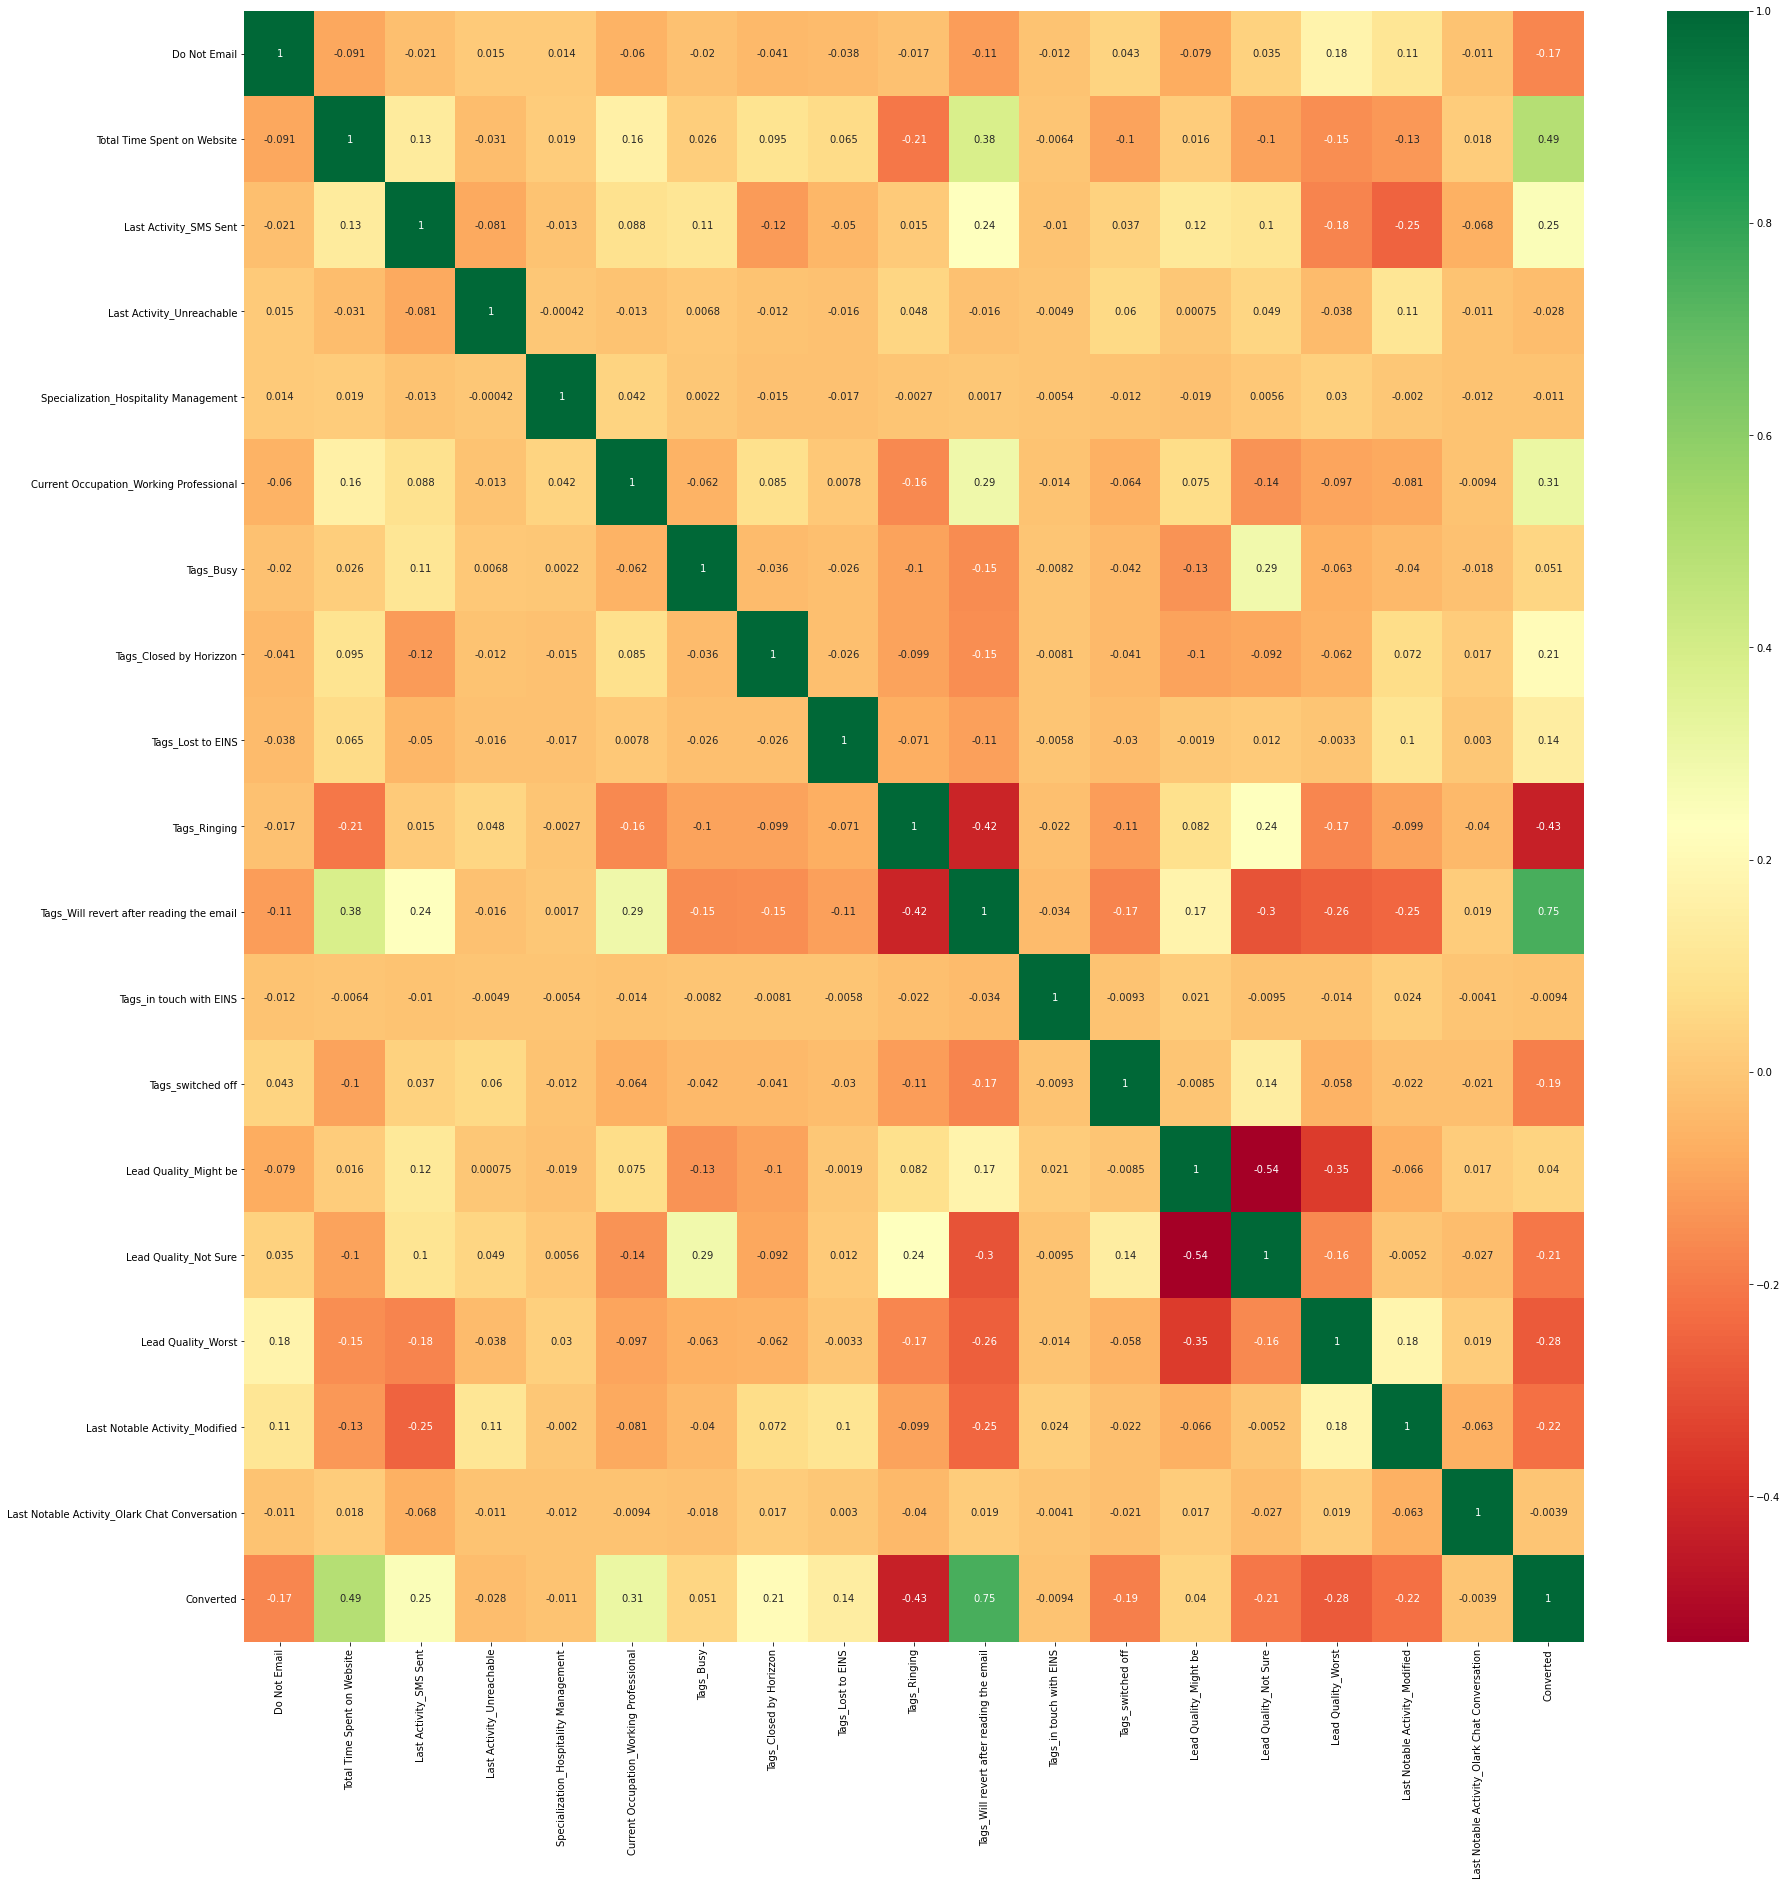

In [95]:
plt.figure(figsize=(30,30))
sns.heatmap(leads_new[final_col_list].corr(), annot=True, cmap='RdYlGn')
plt.show()

# Model Evaluation

In [96]:
y_train_pred = lrm_8.predict(X_train_sm)
y_train_pred.shape

(3447,)

In [97]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred.shape

(3447,)

In [98]:
y_train_pred

array([0.10665551, 0.00179837, 0.00293834, ..., 0.00310833, 0.95612326,
       0.03980657])

In [99]:
y_train_pred_df = pd.DataFrame({'actual_converted':y_train,'prob_converted':y_train_pred})
y_train_pred_df.head()

actual_converted  prob_converted
7442                 0        0.106656
6273                 0        0.001798
6160                 0        0.002938
609                  0        0.013307
4543                 1        0.976881

## Selecting an optimal threshold

In [100]:
from sklearn import metrics

In [101]:
def draw_ROC(actuals, predicted):
    fpr, tpr, thresholds = metrics.roc_curve(actuals, predicted, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actuals, predicted)
    
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [102]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_df.actual_converted , y_train_pred_df.prob_converted, drop_intermediate=False)
#print("{0},{1},{2}".format(fpr,tpr,thresholds))

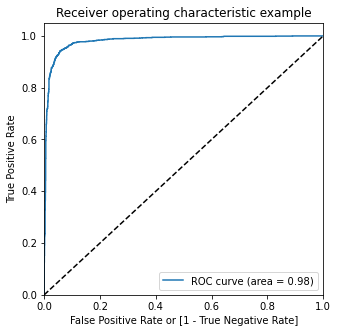

In [103]:
draw_ROC(y_train_pred_df.actual_converted, y_train_pred_df.prob_converted)

In [104]:
for i in range(0,10):
    num = i/10
    y_train_pred_df[num] = y_train_pred_df["prob_converted"].apply(lambda x: 1 if x > num else 0)

In [105]:
y_train_pred_df.head()

actual_converted  prob_converted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
7442                 0        0.106656    1    1    0    0    0    0    0   
6273                 0        0.001798    1    0    0    0    0    0    0   
6160                 0        0.002938    1    0    0    0    0    0    0   
609                  0        0.013307    1    0    0    0    0    0    0   
4543                 1        0.976881    1    1    1    1    1    1    1   

      0.7  0.8  0.9  
7442    0    0    0  
6273    0    0    0  
6160    0    0    0  
609     0    0    0  
4543    1    1    1

In [106]:
cutoff_df = pd.DataFrame(columns=["cutoff","accuracy","sensitivity","specificity"])

In [107]:
for i in range(10):
    num = i/10
    cm1 = metrics.confusion_matrix(y_train_pred_df.actual_converted, y_train_pred_df[num])
    
    total1 = cm1[0,0]+cm1[0,1]+cm1[1,0]+cm1[1,1]
    
    accuracy = (cm1[0,0]+cm1[1,1])/(cm1[0,0]+cm1[1,1]+cm1[1,0]+cm1[0,1])
    
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    
    cutoff_df.loc[i] = [num, accuracy, sensitivity, specificity]

In [108]:
cutoff_df

cutoff  accuracy  sensitivity  specificity
0     0.0  0.438932     1.000000     0.000000
1     0.1  0.906295     0.978189     0.850052
2     0.2  0.927473     0.974223     0.890900
3     0.3  0.933275     0.964309     0.908997
4     0.4  0.935596     0.953734     0.921406
5     0.5  0.940528     0.945142     0.936918
6     0.6  0.940528     0.924653     0.952947
7     0.7  0.934436     0.894911     0.965357
8     0.8  0.926603     0.864508     0.975181
9     0.9  0.886568     0.759418     0.986039

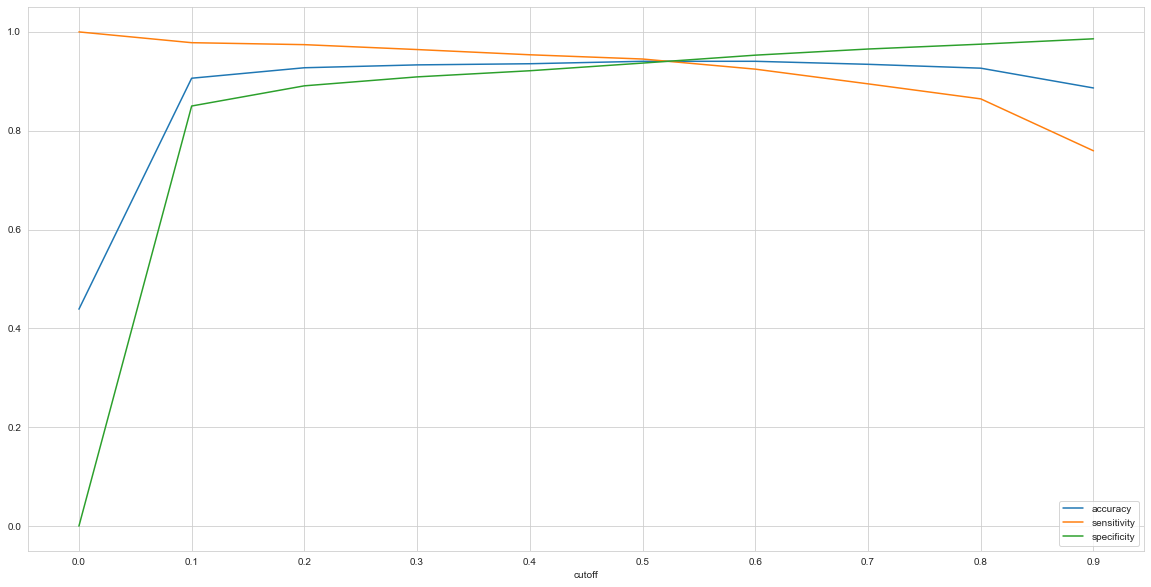

In [109]:
sns.set_style('whitegrid')
cutoff_df.plot.line(x='cutoff', y=["accuracy","sensitivity","specificity"], figsize=(20,10))
plt.xticks(np.arange(0,1,0.1))
plt.show()

***
- We are using sensitivity, specificity and accuracy as a measure to choose an optimal threshold. Since there is no risk involved, we would not be choosing precision or recall here for this problem.
- As can be seen in above plot, optimal cutoff is closed to 0.5, hence we will be choosing 0.5 as our threshold for classifying a lead for conversion.

In [110]:
y_train_pred_df["pred_conversion"] = y_train_pred_df.prob_converted.apply(lambda x: 1 if x > 0.5 else 0)
y_train_pred_df.head()

actual_converted  prob_converted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
7442                 0        0.106656    1    1    0    0    0    0    0   
6273                 0        0.001798    1    0    0    0    0    0    0   
6160                 0        0.002938    1    0    0    0    0    0    0   
609                  0        0.013307    1    0    0    0    0    0    0   
4543                 1        0.976881    1    1    1    1    1    1    1   

      0.7  0.8  0.9  pred_conversion  
7442    0    0    0                0  
6273    0    0    0                0  
6160    0    0    0                0  
609     0    0    0                0  
4543    1    1    1                1

In [111]:
print(metrics.accuracy_score(y_train_pred_df.actual_converted, y_train_pred_df.pred_conversion))

0.9405279953582826


In [112]:
confusion_m = metrics.confusion_matrix(y_train_pred_df.actual_converted, y_train_pred_df.pred_conversion)
confusion_m

array([[1812,  122],
       [  83, 1430]])

In [113]:
TPR = confusion_m[1,1]/(confusion_m[1,1]+confusion_m[1,0])
print(TPR)

0.9451421017845341


In [114]:
TNR = confusion_m[0,0]/(confusion_m[0,0]+confusion_m[0,1])
print(TNR)

0.9369183040330921


- Accuracy for model lrm_8 is 94%
- True Positive Rate is 94.5%
- True Negative Rate is 93.7%
Overall, the model looks very efficient for making predictions

# Evaluation of Test Data

In [115]:
df_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(df_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [116]:
df_test.describe()

Do Not Email    Converted  TotalVisits  Total Time Spent on Website  \
count   1478.000000  1478.000000  1478.000000                  1478.000000   
mean       0.081191     0.449932    -0.000867                    -0.018381   
std        0.273220     0.497655     0.658667                     0.986405   
min        0.000000     0.000000    -0.823853                    -1.220582   
25%        0.000000     0.000000    -0.464723                    -0.888327   
50%        0.000000     0.000000    -0.105593                    -0.393537   
75%        0.000000     1.000000     0.208646                     0.812010   
max        1.000000     1.000000     9.052220                     2.676679   

       Page Views Per Visit  Lead Origin_Landing Page Submission  \
count           1478.000000                          1478.000000   
mean               0.035539                             0.731394   
std                1.295158                             0.443385   
min               -1.748531                             0.000000   
25%               -0.634130                             0.000000   
50%               -0.076930                             1.000000   
75%                0.480270                             1.000000   
max               28.897485                             1.000000   

       Lead Origin_Lead Add Form  Lead Source_Direct Traffic  \
count                1478.000000                 1478.000000   
mean                    0.006766                    0.351150   
std                     0.082004                    0.477491   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     0.000000                    1.000000   
max                     1.000000                    1.000000   

       Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  \
count                1478.0         1478.000000             1478.000000   
mean                    0.0            0.430311                0.013532   
std                     0.0            0.495287                0.115576   
min                     0.0            0.000000                0.000000   
25%                     0.0            0.000000                0.000000   
50%                     0.0            0.000000                0.000000   
75%                     0.0            1.000000                0.000000   
max                     0.0            1.000000                1.000000   

       Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
count                 1478.000000                         1478.0   
mean                     0.179973                            0.0   
std                      0.384295                            0.0   
min                      0.000000                            0.0   
25%                      0.000000                            0.0   
50%                      0.000000                            0.0   
75%                      0.000000                            0.0   
max                      1.000000                            0.0   

       Lead Source_Press_Release  Lead Source_Reference  \
count                1478.000000            1478.000000   
mean                    0.000677               0.006089   
std                     0.026011               0.077822   
min                     0.000000               0.000000   
25%                     0.000000               0.000000   
50%                     0.000000               0.000000   
75%                     0.000000               0.000000   
max                     1.000000               1.000000   

       Lead Source_Referral Sites  Lead Source_Social Media  \
count                 1478.000000                    1478.0   
mean                     0.016238                       0.0   
std                      0.126433                       0.0   
min                      0.000000        

In [117]:
df_test.head()

Do Not Email  Converted  TotalVisits  Total Time Spent on Website  \
4752             0          0     0.073972                    -0.706934   
7268             0          1     0.073972                     1.396151   
2815             1          0     1.330927                     0.458653   
4532             0          1    -0.285158                     1.719426   
9198             0          0    -0.105593                    -1.071517   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
4752              1.037471                                    1   
7268             -0.818006                                    1   
2815              0.480270                                    0   
4532             -0.076930                                    1   
9198              0.480270                                    1   

      Lead Origin_Lead Add Form  Lead Source_Direct Traffic  \
4752                          0                           0   
7268                          0                           1   
2815                          0                           0   
4532                          0                           0   
9198                          0                           0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  \
4752                     0                   1                       0   
7268                     0                   0                       0   
2815                     0                   0                       1   
4532                     0                   1                       0   
9198                     0                   1                       0   

      Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
4752                           0                              0   
7268                           0                              0   
2815                           0                              0   
4532                           0                              0   
9198                           0                              0   

      Lead Source_Press_Release  Lead Source_Reference  \
4752                          0                      0   
7268                          0                      0   
2815                          0                      0   
4532                          0                      0   
9198                          0                      0   

      Lead Source_Referral Sites  Lead Source_Social Media  \
4752                           0                         0   
7268                           0                         0   
2815                           0                         0   
4532                           0                         0   
9198                           0                         0   

      Lead Source_WeLearn  Lead Source_Welingak Website  Lead Source_bing  \
4752                    0                             0                 0   
7268                    0                             0                 0   
2815                    0                             0                 0   
4532                    0                             0                 0   
9198                    0                             0                 0   

      Lead Source_testone  Last Activity_Converted to Lead  \
4752                    0                                0   
7268                    0                                0   
2815                    0                                0   
4532                    0                                0   
9198                    0                                0   

      Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
4752                            0                                 0   
7268                            0                                 0   
2815                            0                                 0   
4532                            0                                 0   
9198        

In [118]:
X_test = df_test[cols]

In [119]:
y_test = df_test['Converted']

In [120]:
y_test

4752    0
7268    1
2815    0
4532    1
9198    0
2483    1
7361    1
4837    1
1750    0
6653    1
6472    1
6596    0
8299    0
407     1
5950    0
4483    0
4445    1
442     0
1812    1
2105    1
8507    0
8095    0
259     0
1772    0
309     1
8625    1
3820    1
7951    0
7560    0
3462    1
3154    0
1489    0
3030    0
6502    1
1676    1
7923    0
8640    0
7486    1
6896    0
8578    1
1175    0
4728    0
6514    0
5209    0
6411    1
2109    1
8626    0
7191    0
2829    0
7965    0
6069    1
3926    1
1598    0
7782    0
8899    1
6749    0
7163    0
7700    0
731     1
5068    1
579     0
1947    0
4066    0
6150    1
6014    0
2016    1
1488    1
4534    0
7096    1
3351    0
3246    1
7439    0
7507    0
7833    1
5626    0
1151    1
910     1
55      0
7740    0
7557    0
1044    0
611     1
2190    0
3426    1
7432    1
2621    1
6002    1
1524    0
7526    1
5762    0
5241    0
5663    0
4295    1
15      1
385     1
1582    0
9033    0
6228    0
3165    1
4510    0


In [121]:
X_test_sm = sm.add_constant(X_test)

In [122]:
X_test_sm.head()

const  Do Not Email  Total Time Spent on Website  \
4752    1.0             0                    -0.706934   
7268    1.0             0                     1.396151   
2815    1.0             1                     0.458653   
4532    1.0             0                     1.719426   
9198    1.0             0                    -1.071517   

      Last Activity_SMS Sent  Last Activity_Unreachable  \
4752                       1                          0   
7268                       1                          0   
2815                       0                          0   
4532                       0                          0   
9198                       0                          0   

      Specialization_Hospitality Management  \
4752                                      0   
7268                                      0   
2815                                      0   
4532                                      0   
9198                                      0   

      Current Occupation_Working Professional  Tags_Busy  \
4752                                        0          0   
7268                                        0          0   
2815                                        0          0   
4532                                        0          0   
9198                                        0          0   

      Tags_Closed by Horizzon  Tags_Lost to EINS  Tags_Ringing  \
4752                        0                  0             1   
7268                        0                  0             0   
2815                        0                  0             0   
4532                        0                  0             0   
9198                        0                  0             0   

      Tags_Will revert after reading the email  Tags_in touch with EINS  \
4752                                         0                        0   
7268                                         1                        0   
2815                                         0                        0   
4532                                         1                        0   
9198                                         0                        0   

      Tags_switched off  Lead Quality_Might be  Lead Quality_Not Sure  \
4752                  0                      1                      0   
7268                  0                      0                      0   
2815                  0                      1                      0   
4532                  0                      0                      0   
9198                  0                      1                      0   

      Lead Quality_Worst  Last Notable Activity_Modified  \
4752                   0                               0   
7268                   0                               0   
2815                   0                               0   
4532                   0                               0   
9198                   0                               0   

      Last Notable Activity_Olark Chat Conversation  
4752                                              0  
7268                                              0  
2815                                              0  
4532                                              0  
9198                                              0

In [123]:
y_test_pred = lrm_8.predict(X_test_sm)
y_test_pred

4752    0.028890
7268    0.997557
2815    0.013685
4532    0.991443
9198    0.009260
2483    0.976757
7361    0.912773
4837    0.989220
1750    0.051495
6653    0.964855
6472    0.973242
6596    0.079504
8299    0.020776
407     0.019486
5950    0.040873
4483    0.854582
4445    0.975436
442     0.001319
1812    0.973613
2105    0.997032
8507    0.039939
8095    0.025269
259     0.008880
1772    0.002168
309     0.649539
8625    0.968674
3820    0.994808
7951    0.019821
7560    0.000503
3462    0.923818
3154    0.009499
1489    0.029397
3030    0.004635
6502    0.941686
1676    0.997095
7923    0.017137
8640    0.106524
7486    0.974676
6896    0.001840
8578    0.916546
1175    0.021864
4728    0.010858
6514    0.011483
5209    0.008927
6411    0.999363
2109    0.943533
8626    0.021540
7191    0.085828
2829    0.025095
7965    0.041357
6069    0.973714
3926    0.996818
1598    0.804255
7782    0.688931
8899    0.954221
6749    0.449501
7163    0.002842
7700    0.006739
731     0.6810

In [124]:
df_test_pred_df = pd.DataFrame(y_test_pred)
df_test_pred_df.head()

0
4752  0.028890
7268  0.997557
2815  0.013685
4532  0.991443
9198  0.009260

In [125]:
df_test_pred_df["Lead_ID"]=df_test_pred_df.index
df_test_pred_df.head()

0  Lead_ID
4752  0.028890     4752
7268  0.997557     7268
2815  0.013685     2815
4532  0.991443     4532
9198  0.009260     9198

In [126]:
df_test_pred_df.rename(columns={0:'prob_converted'}, inplace=True)

In [127]:
df_test_pred_df.head()

prob_converted  Lead_ID
4752        0.028890     4752
7268        0.997557     7268
2815        0.013685     2815
4532        0.991443     4532
9198        0.009260     9198

In [128]:
df_test_pred_df["actual_converted"] = y_test

In [129]:
df_test_pred_df.head()

prob_converted  Lead_ID  actual_converted
4752        0.028890     4752                 0
7268        0.997557     7268                 1
2815        0.013685     2815                 0
4532        0.991443     4532                 1
9198        0.009260     9198                 0

In [130]:
df_test_pred_df["pred_conversion"] = df_test_pred_df["prob_converted"].apply(lambda x: 1 if x>0.5 else 0)

In [131]:
df_test_pred_df.head()

prob_converted  Lead_ID  actual_converted  pred_conversion
4752        0.028890     4752                 0                0
7268        0.997557     7268                 1                1
2815        0.013685     2815                 0                0
4532        0.991443     4532                 1                1
9198        0.009260     9198                 0                0

In [132]:
print(metrics.accuracy_score(df_test_pred_df.actual_converted, df_test_pred_df.pred_conversion))

0.952638700947226


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------

## Below set of code is only for the purpose of answering Q.3 & 4 of the assignment provided with the case study

In [133]:
y_train_pred_df.head()

actual_converted  prob_converted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
7442                 0        0.106656    1    1    0    0    0    0    0   
6273                 0        0.001798    1    0    0    0    0    0    0   
6160                 0        0.002938    1    0    0    0    0    0    0   
609                  0        0.013307    1    0    0    0    0    0    0   
4543                 1        0.976881    1    1    1    1    1    1    1   

      0.7  0.8  0.9  pred_conversion  
7442    0    0    0                0  
6273    0    0    0                0  
6160    0    0    0                0  
609     0    0    0                0  
4543    1    1    1                1

In [134]:
# average time spent on website by leads who have been predicted as positive leads
df_merged_leads = pd.merge(leads_dataset, y_train_pred_df[['pred_conversion']], how="inner", left_index=True, right_index=True)
df_merged_leads.head()

Prospect ID  Lead Number  \
2   8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727   
3   0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719   
4   3256f628-e534-4826-9d63-4a8b88782852       660681   
11  9bc8ce93-6144-49e0-9f9d-080fc980f83c       660570   
12  8bf76a52-2478-476b-8618-1688e07874ad       660562   

                Lead Origin     Lead Source Do Not Email Do Not Call  \
2   Landing Page Submission  Direct Traffic           No          No   
3   Landing Page Submission  Direct Traffic           No          No   
4   Landing Page Submission          Google           No          No   
11  Landing Page Submission  Direct Traffic           No          No   
12                      API  Organic Search           No          No   

    Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
2           1          2.0                         1532                  2.00   
3           0          1.0                          305                  1.00   
4           1          2.0                         1428                  1.00   
11          1          8.0                         1343                  2.67   
12          1         11.0                         1538                 11.00   

              Last Activity Country             Specialization  \
2              Email Opened   India    Business Administration   
3               Unreachable   India      Media and Advertising   
4         Converted to Lead   India                     Others   
11  Page Visited on Website   India  Human Resource Management   
12             Email Opened   India       Marketing Management   

   How did you hear about X Education What is your current occupation  \
2                       Online Search                         Student   
3                       Word Of Mouth                      Unemployed   
4                               Other                      Unemployed   
11                      Online Search                      Unemployed   
12                      Online Search                      Unemployed   

   What matters most to you in choosing a course Search Magazine  \
2                        Better Career Prospects     No       No   
3                        Better Career Prospects     No       No   
4                        Better Career Prospects     No       No   
11                       Better Career Prospects     No       No   
12                       Better Career Prospects     No       No   

   Newspaper Article X Education Forums Newspaper Digital Advertisement  \
2                 No                 No        No                    No   
3                 No                 No        No                    No   
4                 No                 No        No                    No   
11                No                 No        No                    No   
12                No                 No        No                    No   

   Through Recommendations Receive More Updates About Our Courses  \
2                       No                                     No   
3                       No                                     No   
4                       No                                     No   
11                      No                                     No   
12                      No                                     No   

                                   Tags Lead Quality  \
2   Will revert after reading the email     Might be   
3                               Ringing     Not Sure   
4   Will revert after reading the email     Might be   
11                         Lost to EINS     Might be   
12  Will revert after reading the email     Might be   

   Update me on Supply Chain Content Get updates on DM Content  \
2                                 No                        No   
3                                 No                        No   
4                                 No                        No   
11                                No                  

In [135]:
df_test_pred_df.head()

prob_converted  Lead_ID  actual_converted  pred_conversion
4752        0.028890     4752                 0                0
7268        0.997557     7268                 1                1
2815        0.013685     2815                 0                0
4532        0.991443     4532                 1                1
9198        0.009260     9198                 0                0

In [136]:
df_merged_leads_1 = pd.merge(leads_dataset, df_test_pred_df[['pred_conversion']], how="inner", left_index=True, right_index=True)
df_merged_leads_1.head()

Prospect ID  Lead Number  \
1   2a272436-5132-4136-86fa-dcc88c88f482       660728   
6   9fae7df4-169d-489b-afe4-0f3d752542ed       660673   
10  2a369e35-ca95-4ca9-9e4f-9d27175aa320       660608   
13  88867067-3750-4753-8d33-1c7d1db53b5e       660558   
15  25f4ac14-ff4b-4cd2-9c61-b44c85e19c8f       660547   

                Lead Origin     Lead Source Do Not Email Do Not Call  \
1                       API  Organic Search           No          No   
6   Landing Page Submission          Google           No          No   
10  Landing Page Submission  Organic Search           No          No   
13  Landing Page Submission  Organic Search           No          No   
15                      API  Organic Search           No          No   

    Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
1           0          5.0                          674                   2.5   
6           1          2.0                         1640                   2.0   
10          1          8.0                         1351                   8.0   
13          0          5.0                          170                   5.0   
15          1          6.0                         1012                   6.0   

   Last Activity Country           Specialization  \
1   Email Opened   India                   Others   
6   Email Opened   India  Supply Chain Management   
10  Email Opened   India       Travel and Tourism   
13  Email Opened   India  Business Administration   
15  Email Opened   India                   Others   

   How did you hear about X Education What is your current occupation  \
1                       Online Search                      Unemployed   
6                       Online Search                      Unemployed   
10                      Online Search                      Unemployed   
13                      Online Search                      Unemployed   
15                      Online Search                      Unemployed   

   What matters most to you in choosing a course Search Magazine  \
1                        Better Career Prospects     No       No   
6                        Better Career Prospects     No       No   
10                       Better Career Prospects     No       No   
13                       Better Career Prospects     No       No   
15                       Better Career Prospects     No       No   

   Newspaper Article X Education Forums Newspaper Digital Advertisement  \
1                 No                 No        No                    No   
6                 No                 No        No                    No   
10                No                 No        No                    No   
13                No                 No        No                    No   
15                No                 No        No                    No   

   Through Recommendations Receive More Updates About Our Courses  \
1                       No                                     No   
6                       No                                     No   
10                      No                                     No   
13                      No                                     No   
15                      No                                     No   

                                   Tags      Lead Quality  \
1                               Ringing          Might be   
6   Will revert after reading the email  Low in Relevance   
10  Will revert after reading the email          Might be   
13                              Ringing          Might be   
15  Will revert after reading the email          Might be   

   Update me on Supply Chain Content Get updates on DM Content  \
1                                 No                        No   
6                                 No                        No   
10                                No                        No   
13                                No                        No   
15                                No

In [137]:
df_merged_leads.shape

(3447, 34)

In [138]:
df_merged_leads_1.shape

(1478, 34)

In [139]:
df_merged_final = pd.concat([df_merged_leads, df_merged_leads_1], axis=0)
df_merged_final.shape

(4925, 34)

In [140]:
df_merged_final[df_merged_final["pred_conversion"]==1]["Total Time Spent on Website"].mean()

972.8522167487685

In [141]:
df_merged_final.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'pred_conversion'],
      dtype='object')

In [142]:
key_list = list(cols.values)
key_list.append('pred_conversion')
key_list

['Do Not Email',
 'Total Time Spent on Website',
 'Last Activity_SMS Sent',
 'Last Activity_Unreachable',
 'Specialization_Hospitality Management',
 'Current Occupation_Working Professional',
 'Tags_Busy',
 'Tags_Closed by Horizzon',
 'Tags_Lost to EINS',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Tags_in touch with EINS',
 'Tags_switched off',
 'Lead Quality_Might be',
 'Lead Quality_Not Sure',
 'Lead Quality_Worst',
 'Last Notable Activity_Modified',
 'Last Notable Activity_Olark Chat Conversation',
 'pred_conversion']

In [143]:
df_1 = pd.merge(df_test, df_merged_final[['pred_conversion']], right_index=True, left_index=True, how='inner')
df_1.shape

(1478, 153)

In [144]:
df_1[df_1['pred_conversion']==0]['pred_conversion'].count()

797

In [145]:
pivot_1 = pd.pivot_table(data=df_1, values=df_1.columns, columns='pred_conversion', aggfunc='mean')
pivot_1

pred_conversion                                            0         1
Came to know From_Email                             0.003764  0.002937
Came to know From_Multiple Sources                  0.016311  0.024963
Came to know From_Online Search                     0.848181  0.785609
Came to know From_Other                             0.023839  0.044053
Came to know From_SMS                               0.000000  0.001468
Came to know From_Social Media                      0.006274  0.013216
Came to know From_Student of SomeSchool             0.041405  0.058737
Came to know From_Word Of Mouth                     0.047679  0.055800
City_Other Cities                                   0.104141  0.099853
City_Other Cities of Maharashtra                    0.047679  0.069016
City_Other Metro Cities                             0.058971  0.064611
City_Thane & Outskirts                              0.095358  0.105727
City_Tier II Cities                                 0.018821  0.005874
Converted                                           0.033877  0.936858
Copy of Mastering The Interview_1                   0.454203  0.418502
Country_Bahrain                                     0.000000  0.000000
Country_Bangladesh                                  0.000000  0.000000
Country_Canada                                      0.000000  0.000000
Country_China                                       0.000000  0.000000
Country_Denmark                                     0.000000  0.000000
Country_France                                      0.000000  0.001468
Country_Germany                                     0.001255  0.000000
Country_Ghana                                       0.001255  0.000000
Country_Hong Kong                                   0.002509  0.002937
Country_India                                       0.959849  0.967695
Country_Indonesia                                   0.000000  0.000000
Country_Italy                                       0.000000  0.000000
Country_Kenya                                       0.000000  0.000000
Country_Kuwait                                      0.001255  0.000000
Country_Malaysia                                    0.000000  0.000000
Country_Netherlands                                 0.000000  0.000000
Country_Nigeria                                     0.002509  0.000000
Country_Oman                                        0.001255  0.002937
Country_Philippines                                 0.000000  0.000000
Country_Qatar                                       0.001255  0.001468
Country_Russia                                      0.000000  0.000000
Country_Saudi Arabia                                0.002509  0.002937
Country_Singapore                                   0.001255  0.005874
Country_South Africa                                0.002509  0.000000
Country_Sri Lanka                                   0.001255  0.000000
Country_Sweden                                      0.000000  0.000000
Country_Tanzania                                    0.000000  0.000000
Country_Uganda                                      0.000000  0.000000
Country_United Arab Emirates                        0.008783  0.010279
Country_United Kingdom                              0.003764  0.000000
Country_United States                               0.007528  0.004405
Country_Vietnam                                     0.000000  0.000000
Current Occupation_Housewife                        0.000000  0.001468
Current Occupation_Other                            0.001255  0.002937
Current Occupation_Student                          0.025094  0.029369
Current Occupation_Unemployed                       0.959849  0.763583
Current Occupation_Working Professional             0.013802  0.199706
Do Not Email                                        0.127980  0.026432
Last Activity_Converted to Lead                     0.071518  0.024963
Last Activity_Email Bounced                         0.056462  0.002937
Last Activity_Email Link

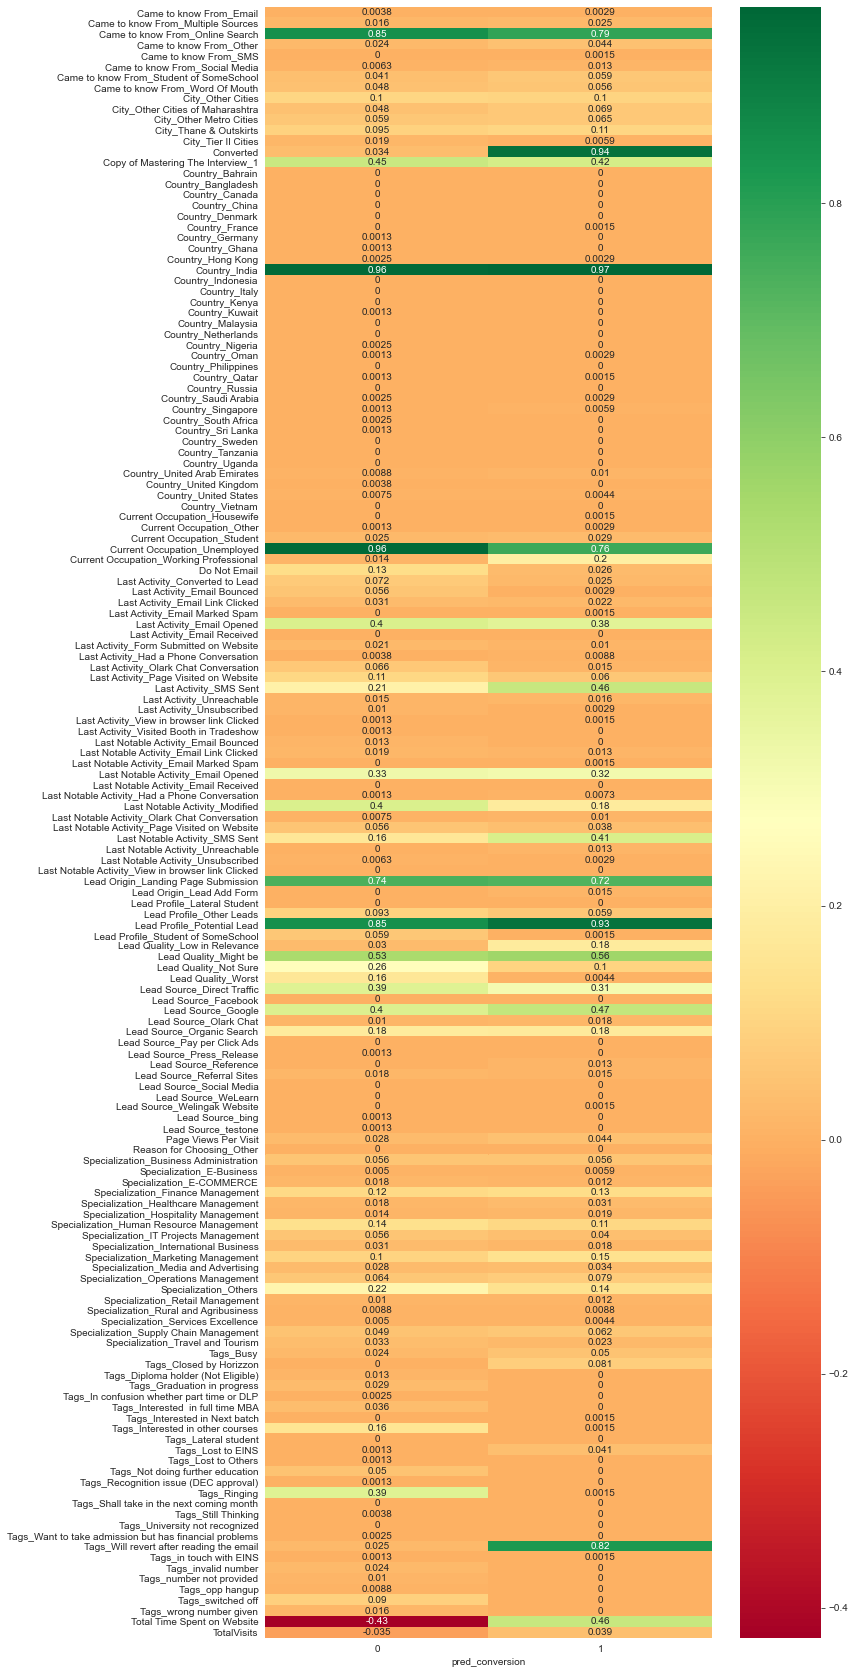

In [146]:
plt.figure(figsize=(10,30))
sns.heatmap(pivot_1, annot=True, cmap='RdYlGn')
plt.show()